<a href="https://colab.research.google.com/github/aschera/Capstone-Project-Colmar-Academy/blob/master/Generative_art_in_R_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your friendly intro to creating generative art with R 

# Setting up your R environment

Before starting, please make sure you are in an "R runtime". To check this go to Runtime -> Change runtime type. A little box with details about your runtime pops up. Runtime type should say "R". Don't change anything, just close the dialogue by clicking 'cancel'.

You should run the cells below (press shift and enter or click the litte play-button next to the cell) during the intro talk as this will take *a while* to execute. You should execute the cells in order (from top down) to avoid issues. Do this until you hit the text "End of set-up".

In [1]:
system("apt-get -y update")
# R packages have mysterious linux library dependencies and the error messages on colab are uninformative, 
# so let us install pretty much anything we could possibly want or need
system("apt-get install -y r-base r-base-dev")
system("apt-get install -y cargo cmake default-jdk fonts-roboto htop libcairo2-dev libclang-dev libcurl4-openssl-dev libfontconfig1-dev libfreetype6-dev libfribidi-dev libgdal-dev libgeos-dev libharfbuzz-dev libjpeg-dev libmagick++-dev libproj-dev libpng-dev libpq-dev libsodium-dev libssl-dev libtiff5-dev libudunits2-dev libx11-dev libxml2-dev openjdk-8-jdk openjdk-8-jre pandoc ttf-mscorefonts-installer xorg-dev")


Next, we install the packages we are using today and their dependencies. Dependencies are other packages that our "main" packages rely on to work properly. This section can take up to 45 mins to run! We'll talk about what packages are and why we need them soon.

In [2]:
install.packages("Rcpp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’




In [4]:
install.packages("mapproj")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘maps’




In [5]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘conflicted’, ‘jsonlite’, ‘stringr’




In [6]:
install.packages("ggforce")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’




In [7]:
install.packages("aRtsy")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘igraph’, ‘ambient’, ‘e1071’, ‘kknn’, ‘randomForest’, ‘RcppArmadillo’




In [8]:
devtools::install_github("marcusvolz/mathart")

rlang       (1.1.0 -> 1.1.1 ) [CRAN]
vctrs       (0.6.1 -> 0.6.2 ) [CRAN]
viridisLite (0.4.1 -> 0.4.2 ) [CRAN]
wk          (NA    -> 0.7.3 ) [CRAN]
units       (NA    -> 0.8-2 ) [CRAN]
s2          (NA    -> 1.1.3 ) [CRAN]
classInt    (NA    -> 0.4-9 ) [CRAN]
dplyr       (1.1.1 -> 1.1.2 ) [CRAN]
isoband     (0.2.6 -> 0.2.7 ) [CRAN]
sf          (NA    -> 1.0-12) [CRAN]
V8          (NA    -> 4.3.0 ) [CRAN]
deldir      (NA    -> 1.0-6 ) [CRAN]
concaveman  (NA    -> 1.1.0 ) [CRAN]


Installing 13 packages: rlang, vctrs, viridisLite, wk, units, s2, classInt, dplyr, isoband, sf, V8, deldir, concaveman

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmprKeifB/remotes273bb6b978/marcusvolz-mathart-df58164/DESCRIPTION’ ... OK
* preparing ‘mathart’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘mathart_0.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library(repr)
library(ggplot2)
library(dplyr)
library(aRtsy)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# in case you run into issues with installations, code mentors may want to use this to check what is happening
# will output information about the current R session and packages
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] stringr_1.5.0 aRtsy_0.2.2   dplyr_1.1.2   ggplot2_3.4.2 repr_1.1.6   

loaded via a namespace (and not attached):
 [1] generics_0.1.3    utf8_1.2.3        stringi_1.7.12    dig

## End of set-up! 


# Functions and arguments

We'll start our plotting journey by working on a function that creates watercolor-like patterns. This function is part of a package called aRtsy. What the function does is that it takes some polygons (squares, triangles etc) and warps them a little bit and repeats this a number of times so that it looks like the polygons get a watercolor-y soft edge.

Packages often have documentation related to the functionality that is available. This function has documentation [here](https://koenderks.github.io/aRtsy/reference/canvas_watercolors.html). 

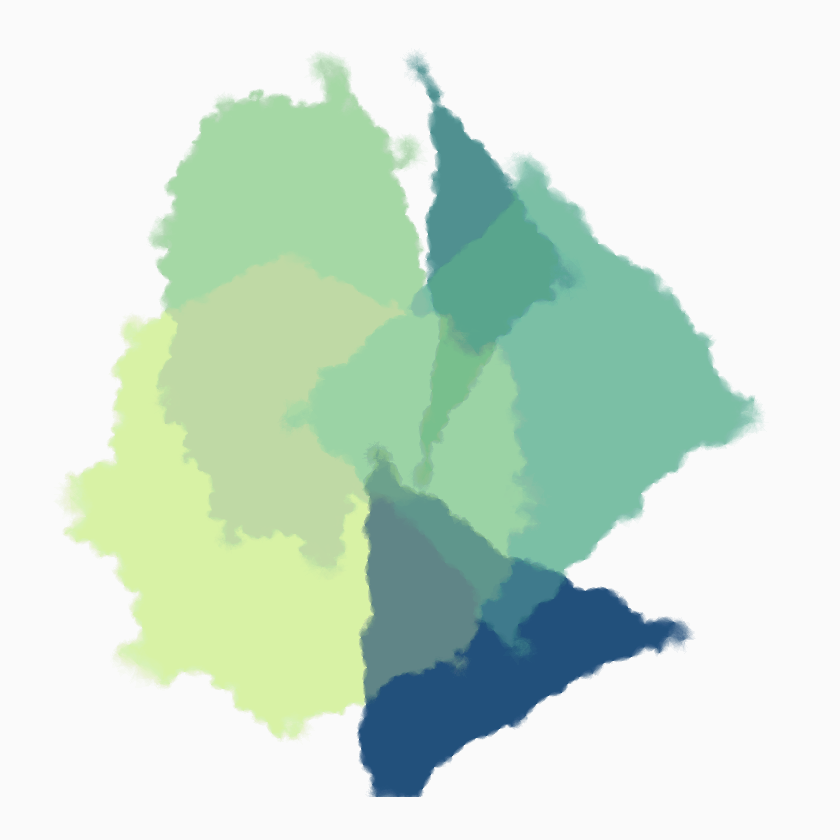

In [12]:
# the main function is called canvas_watercolors()
# it needs an argument called colors that gives it a list of colors that will be used in the plot
# we get the list of colors from another function, called "colorPalette"
# you will get a chance to try out different palettes soon!
canvas_watercolors(colors = colorPalette("sky"))

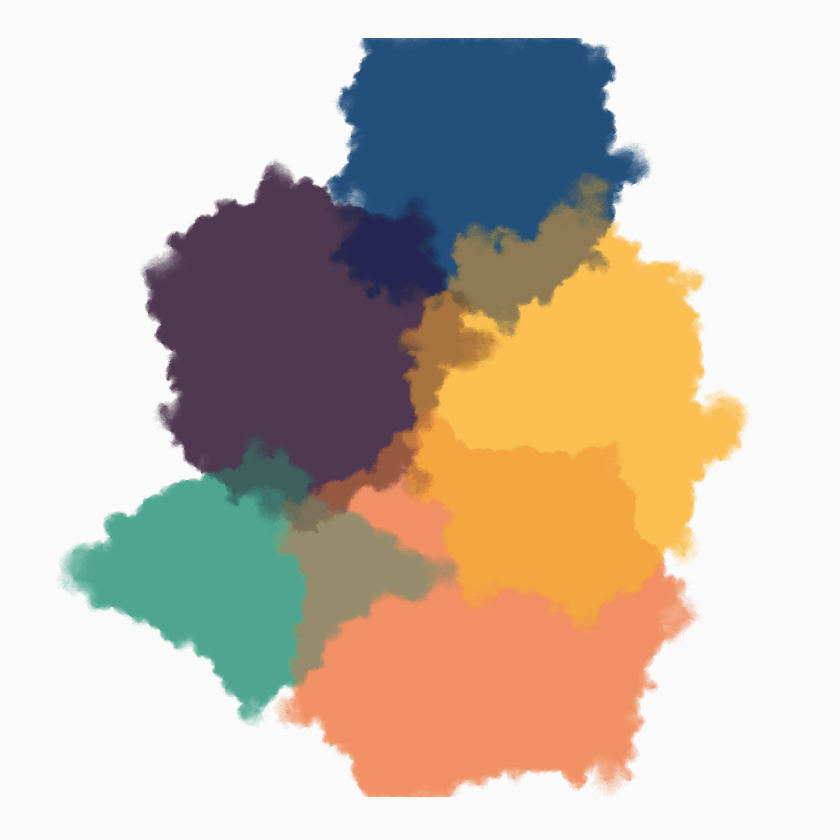

In [13]:
# notice how the name of the palette has quotes (both "" and '' work) around it? 
# We'll talk more about it soon! 
# But for now, just make sure you give your palette name with "" around it
canvas_watercolors(colors = colorPalette("vrolik1"))

Try to change the plot to use another color palette (you can find a list of available palettes [here](https://koenderks.github.io/aRtsy/index.html#color-palettes)).

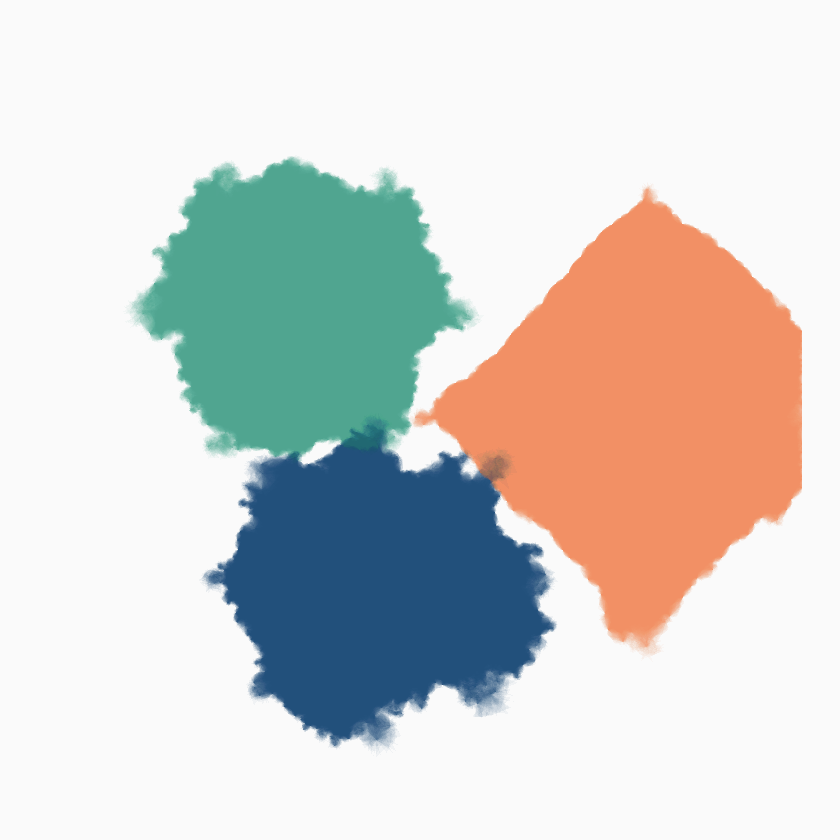

In [14]:
# you can control the number of blobs that appear by asking the function 
# colorPalette() for a specific number of colors.
# Notice that the number of colors should not have quotes around it!
canvas_watercolors(colors = colorPalette("vrolik1", 3))

This type of plot has a parameter called "layers". Try out what happens when you change the value of this parameter.

attempt to select more colors than are available in this palette, returning the requested palette with the maximum number of colors



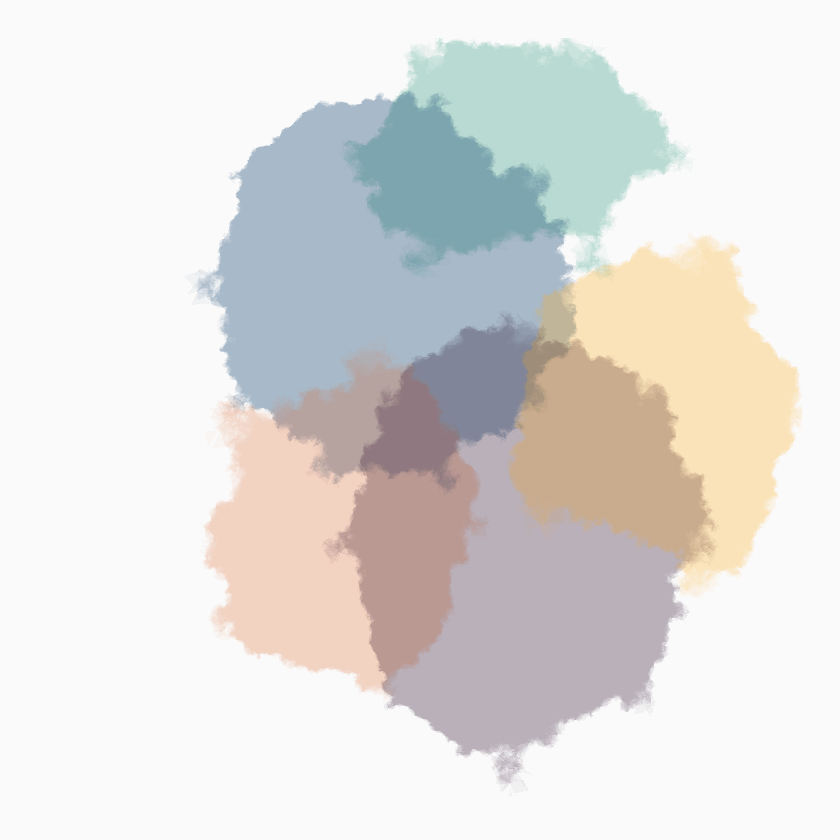

In [16]:
canvas_watercolors(colors = colorPalette("vrolik1", 8), layers=10)

This function also has a parameter "depth" that is by default set to 2. This parameter controls the amount of warping and smudging that happens on the edges of your polygons. You can try to change this parameter too, but if you select a very high number (above 6 or so) it will take much longer to run (how long will depend on the number you chose). 

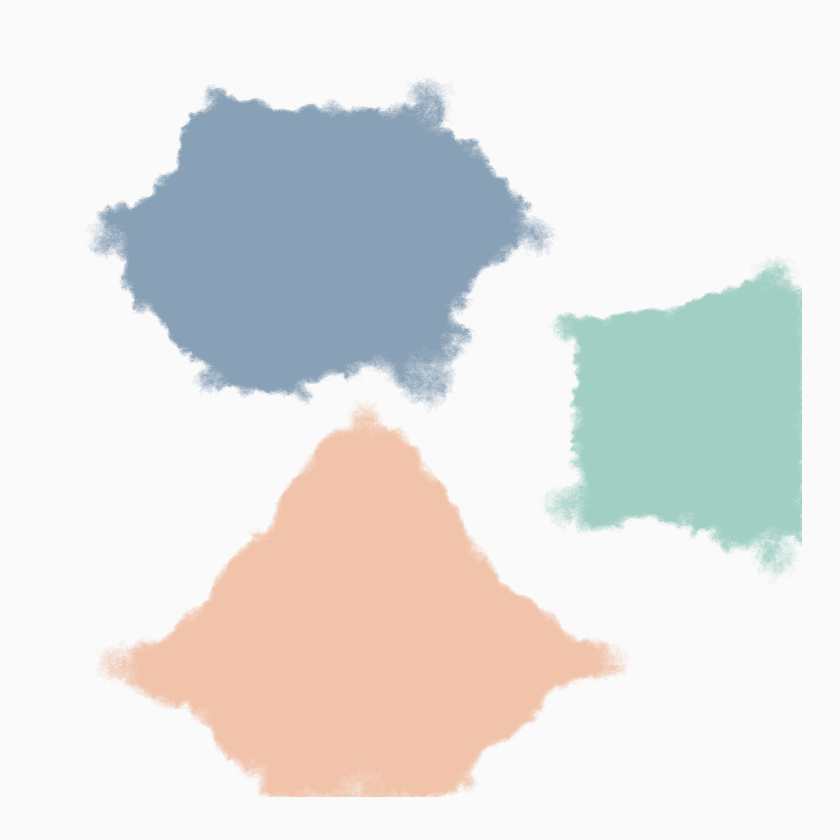

In [17]:
canvas_watercolors(colors = colorPalette("vrolik1", 3), layers=15, depth=5)

In [18]:
# ggave() is a function that saves the plot you most recently generated to your google colab runtime
# the argument it takes is a filename, including file ending, that you want to use to save your creation
# remember to download your plots from colab before you leave this workshop! otherwise they may disappear :(
ggsave('pretty_plot_1.png')

Saving 6.67 x 6.67 in image


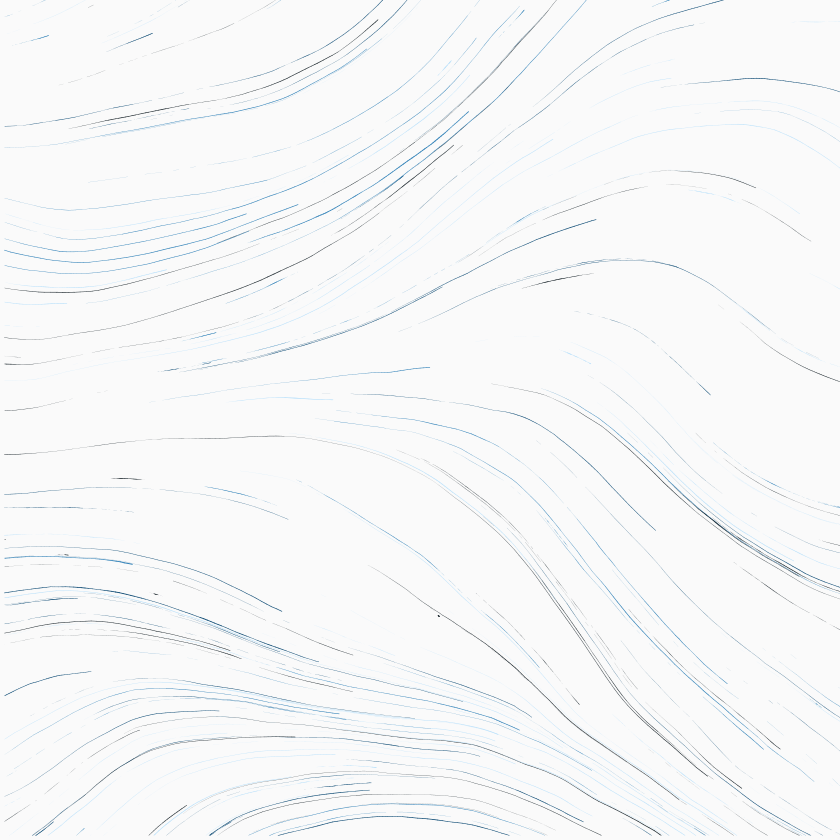

In [19]:
set.seed(1)
canvas_flow(colors = colorPalette("dark2"))

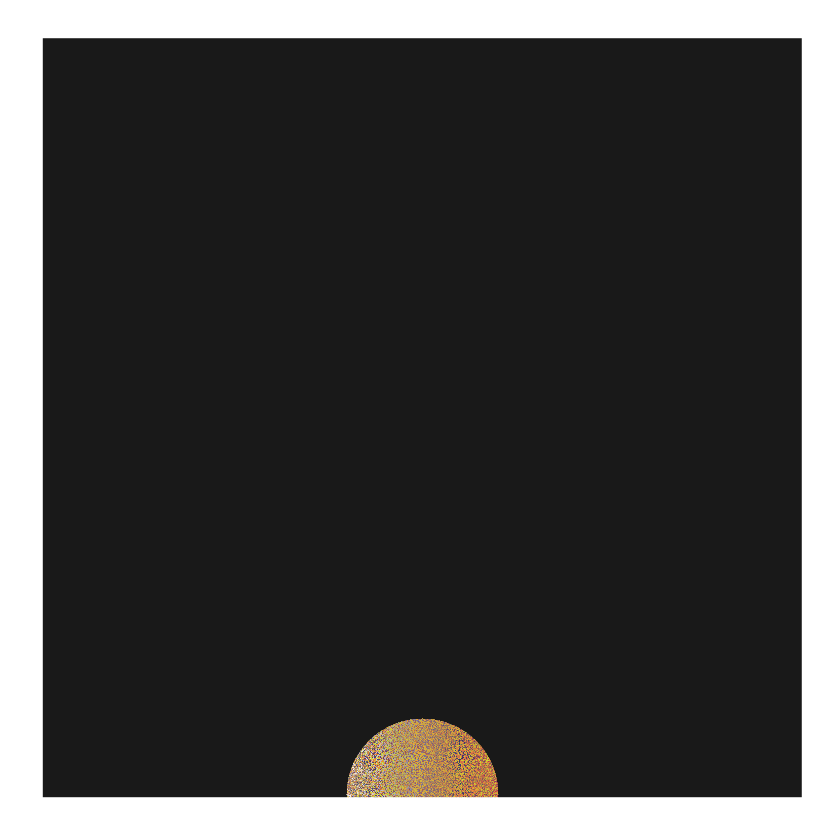

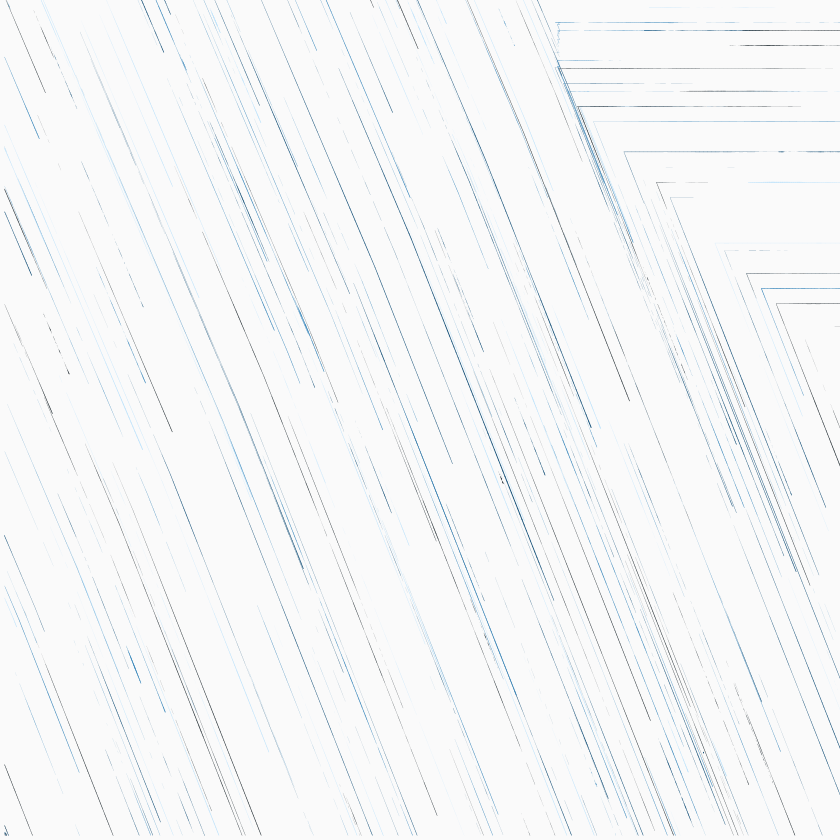

In [32]:
# ?canvas_planet
set.seed(1)
canvas_planet(colors = colorPalette("retro3"), threshold = 8, iterations = 100,
                   starprob = 0.9,  fade = 0.8,
                   radius = 150, center.x = NULL, center.y = 5,
                   light.right = FALSE, resolution = 1500)
canvas_flow(colors = colorPalette("dark2"))


Let's hop back to theory and talk a little bit about randomness, functions, variables and plotting. This will help us a lot doing the next tasks type of art! 

# Let's work with variables


In [33]:
# we assign variable using the assign operator <- (also = can be used, but <- is what people typically use with R)
variable1 <- 1
# we can see what value the variable has assigned to it if we print it
print(variable1)

[1] 1


In [34]:
# if instead we say 
print("variable1")
# we get a different response. Why?

[1] "variable1"


In [35]:
# we can also repeat the process
variable1 <- 3
# what value do we think the variable now has assigned to it? 1, 3, or both?

In [36]:
# let's test to find out!
print(variable1)

[1] 3


In [39]:
# what happens here? 
print(variable1)

[1] 3


# Let's draw some pretty pretty maths equations

In this section, we'll work with a function called "canvas_function()". Here, the function part of the name relates to mathematical functions. You can see documentation for canvas_function() [here](https://koenderks.github.io/aRtsy/reference/canvas_function.html).

[1] 2217


Saving 6.67 x 6.67 in image


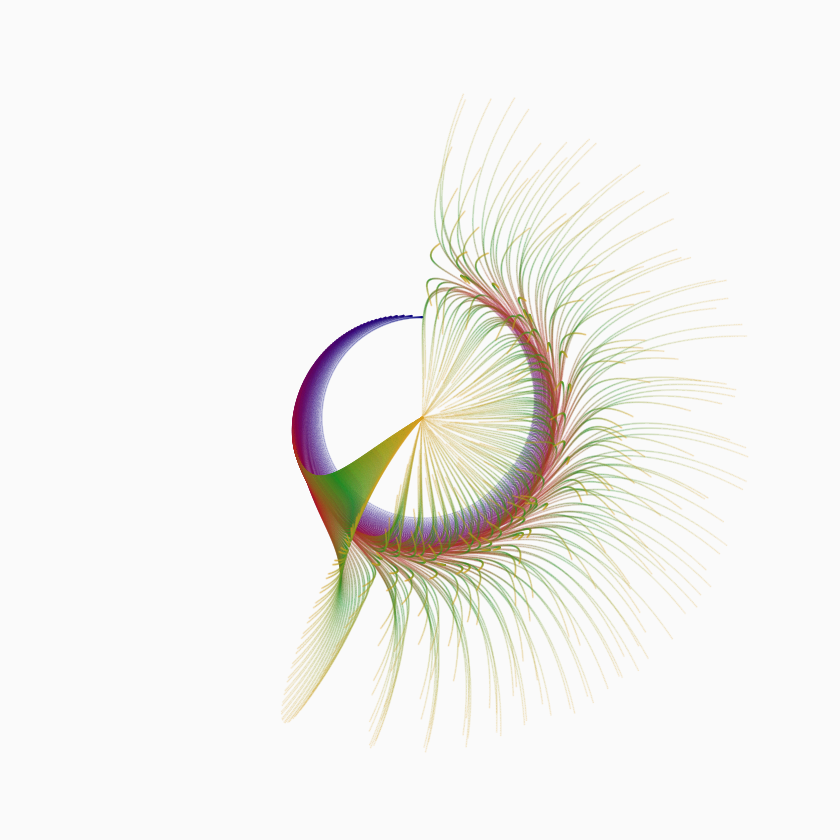

In [40]:
# we're creating a variable to hold our random seed and picking a number at random for it
my_seed <- round(runif(1, 0, 10000))
# set the random seed (needs to be done in each cell you want to use it!)
set.seed(my_seed)
# print the seed in case we really loved our plot want to continue to work with it
print(my_seed)

canvas_function(colors = colorPalette("tuscany1"))
ggsave(str_c('canvas-function-',my_seed,'.png'))

[1] 3300


Saving 6.67 x 6.67 in image


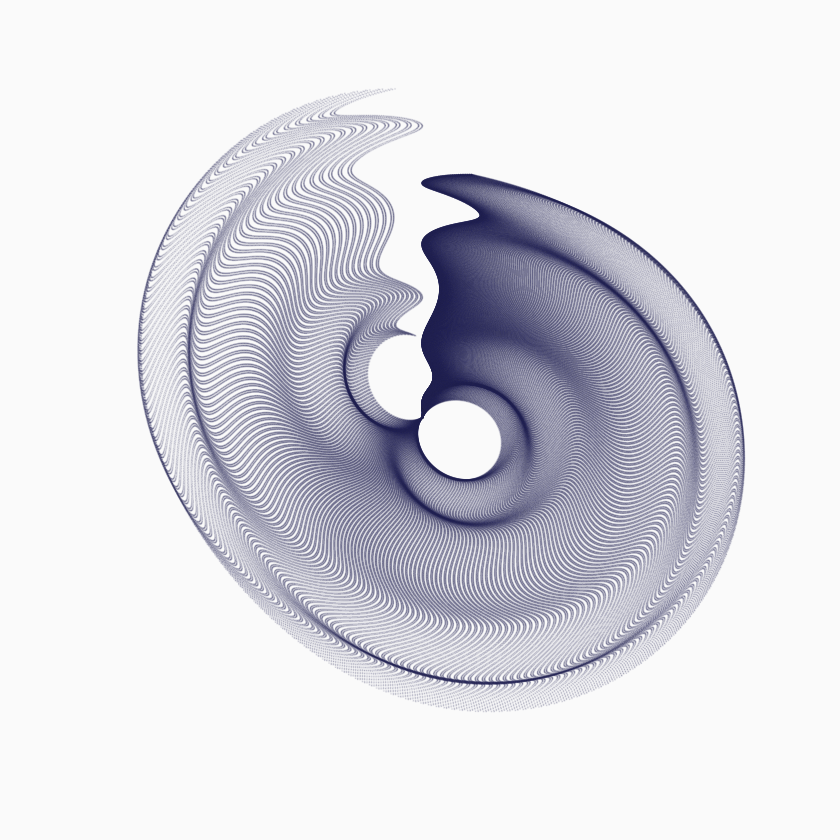

In [41]:
# let's first find a color palette or color we like better than the default
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)
print(my_seed)

canvas_function(colors = "#242254")
ggsave(str_c('canvas-function-',my_seed,'.png'))

The function builds on mathematical equations being plotted. You can either take a randomly assigned equation (as we did above) or you can define your own for more control over the end result. It is a good idea to have a component that is random (runif() is a good function for that) in the formula as well as sin() or cos() function as they tend to be pretty.

In [42]:
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)
print(my_seed)

# here we define a starting formula that has a bit of randomness and sine and cosine
# but not much else funky
simple_formula <- list(
  x = quote(runif(1, -1, 1) * x_i - sin(y_i)),
  y = quote(runif(1, -1, 1) * y_i - cos(x_i))
)


[1] 3336


Saving 6.67 x 6.67 in image


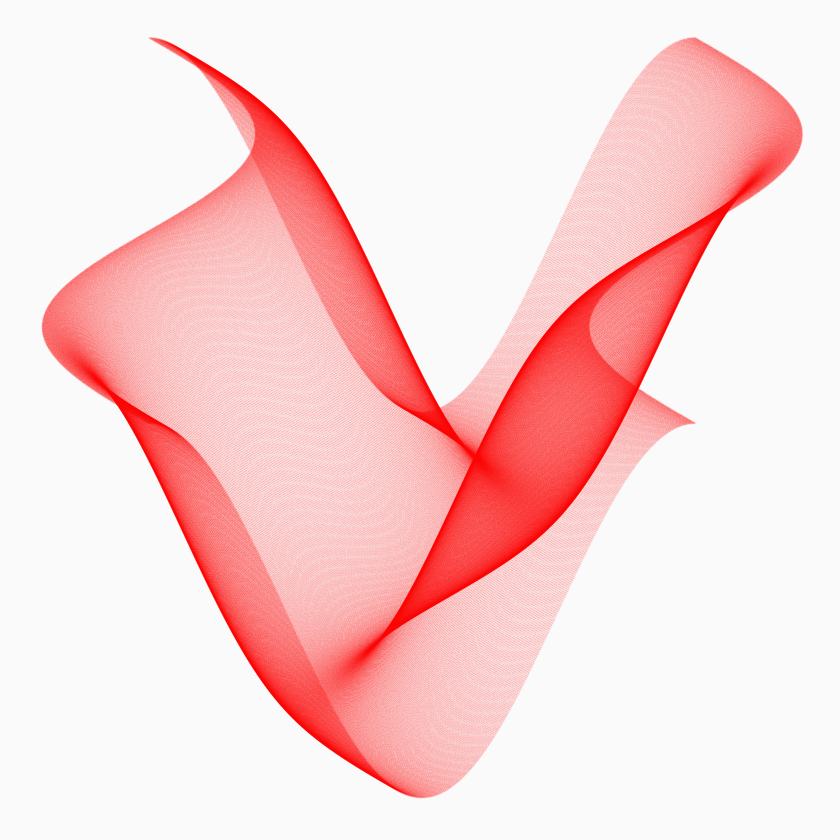

In [43]:
# plot our own formula with carteesian coordinates (polar=FALSE)
# and our own defined color(s)
# if you want to experiment with iterations of this, 
# run both the previous cell and this one to get new random seed
# (and thereby new multipliers in your formula)
set.seed(my_seed)
canvas_function(colors = "red", formula=simple_formula, polar = FALSE)
ggsave(str_c('simple-function-carteesian-coordinates-',my_seed,'.png'))

Saving 6.67 x 6.67 in image


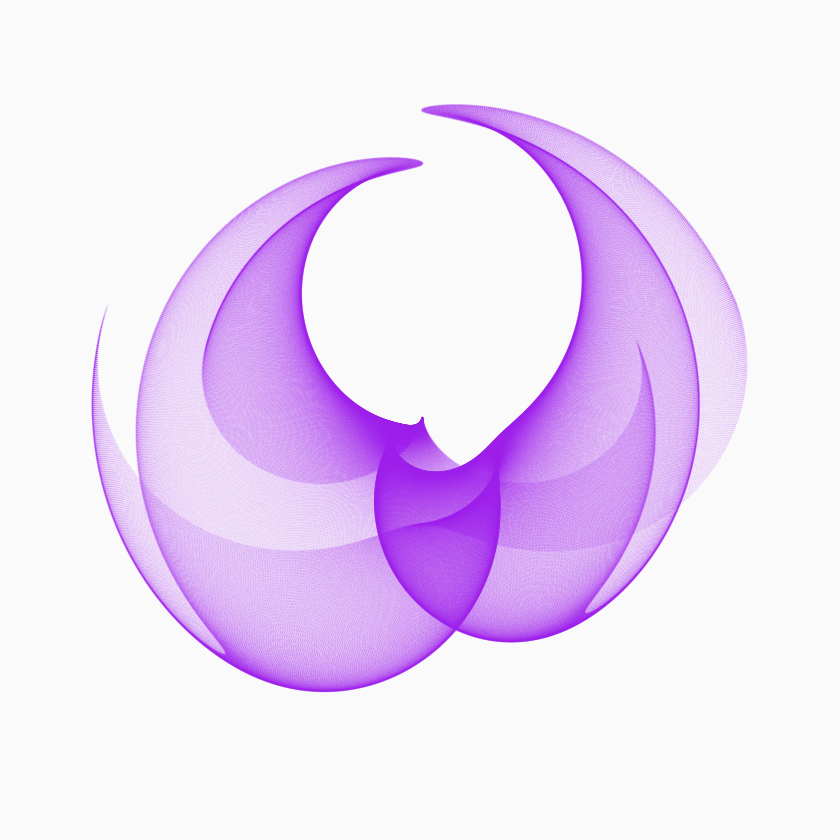

In [54]:
# let us move the same plot to polar coordinates
# it is the same as before since we're using same random seed throughout
set.seed(my_seed)
canvas_function(colors = "purple", formula=simple_formula, polar = TRUE)
ggsave(str_c('simple-function-polar-coordinates-',my_seed,'.png'))

In [49]:
# let us make the formula a little bit more complex - now we have exponent (^) 
# in addition to randomness and sine + cosine
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)
print(my_seed)

more_complex_formula <- list(
  x = quote(runif(1, -10, 1) * x_i^4 - sin(y_i^9)),
  y = quote(runif(1, -8, 1) * y_i^13 - cos(x_i^2)+30)
)


[1] 9289


Saving 6.67 x 6.67 in image


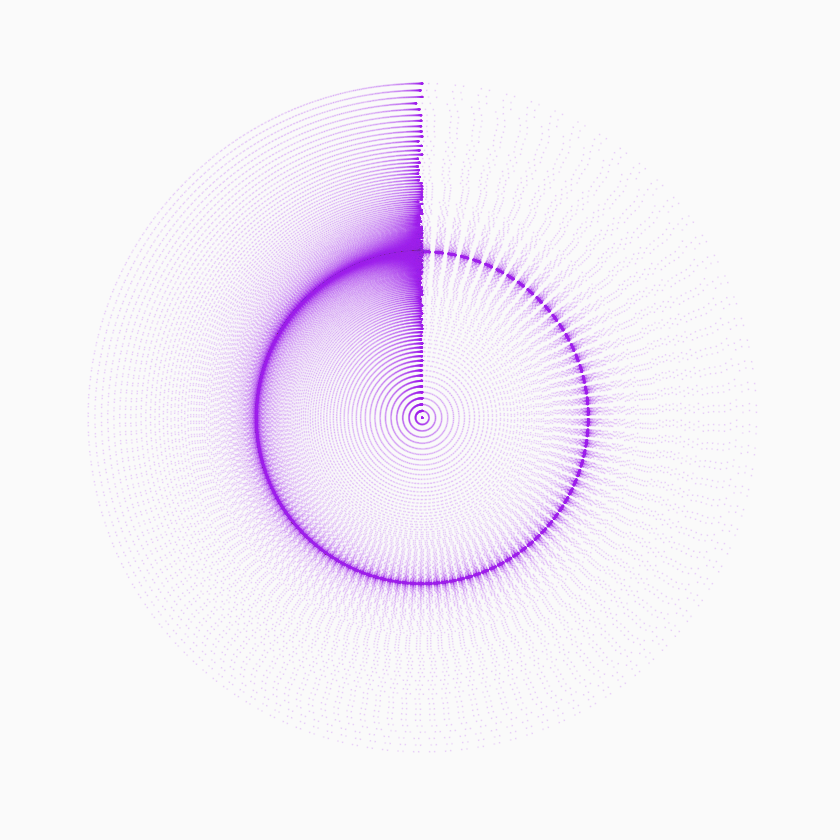

In [50]:
# plot something with more complex formula - decide for yourself if you want 
# polar coordinates or carteesian coordinates
set.seed(my_seed)
canvas_function(colors = "purple", formula=more_complex_formula, polar = TRUE)
ggsave(str_c('complex-function-',my_seed,'.png'))

[1] 7684


Saving 6.67 x 6.67 in image


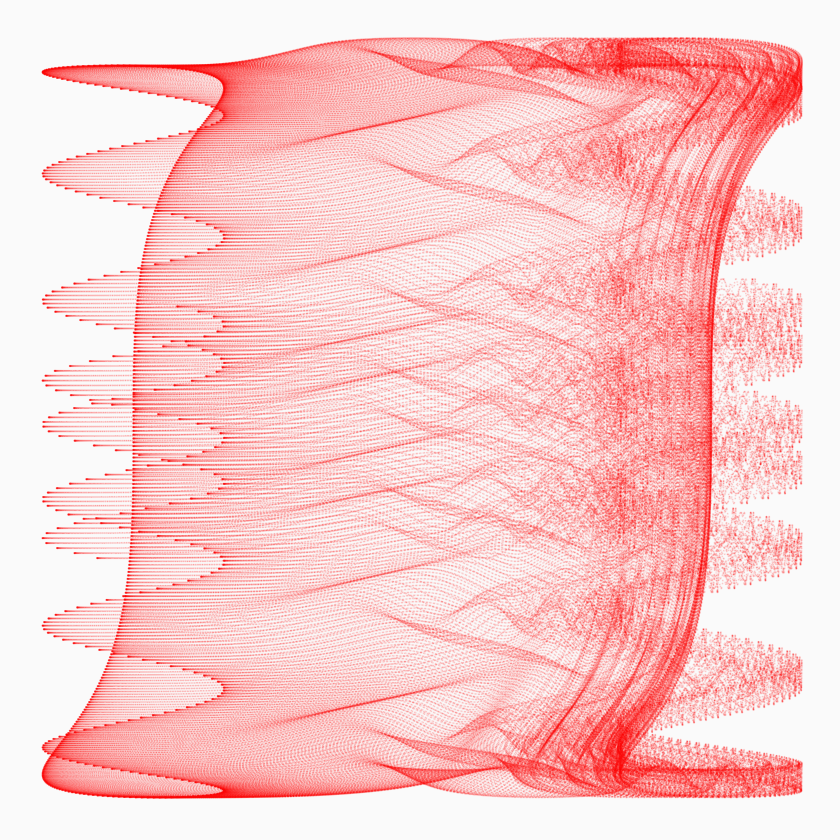

In [52]:
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)
print(my_seed)

# if you feel up for it,
# now is your time to go to town and see if you can come up with a formula that
# makes something pretty!
my_custom_formula <- list(
  x = quote(runif(1, -1, 1) * x_i^2 - sin(y_i^3) + runif(1,-10,1) * cos(x_i) ),
  y = quote(runif(1, -1, 1) * y_i^3 - cos(x_i^4) + runif(1,-100,1) * sin(y_i) )
)

# pick polar coordinates TRUE or FALSE depending on which one you like better!
canvas_function(colors = "red", formula=my_custom_formula, polar = FALSE)
ggsave(str_c('custom-function-',my_seed,'.png'))

Now it's time to keep experimenting! Pick another plot type from the [aRtsy package homesite](https://koenderks.github.io/aRtsy/index.html) and try to make the corresponding plot. Try first with the same exact settings that are listed on the homepage and then start making it your own with changing parameters etc. 

Saving 6.67 x 6.67 in image


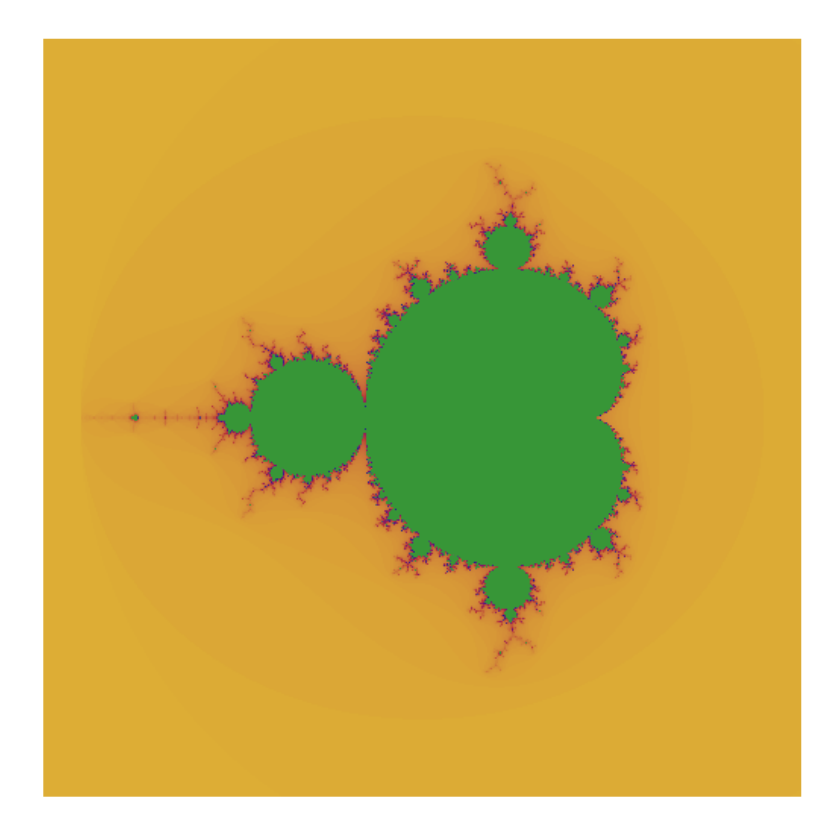

In [60]:
# you can experiment in this cell!
# first we explicitly set the random seed
my_seed <- round(runif(1, 0, 958639673))
set.seed(my_seed)

my_custom_formula <- list(
  x = quote(runif(1, -1, 1) * x_i^2 - sin(y_i^3) + runif(1,-10,1) * cos(x_i) ),
  y = quote(runif(1, -1, 1) * y_i^3 - cos(x_i^4) + runif(1,-100,1) * sin(y_i) )
)


#
# your plotting code goes here
#
canvas_mandelbrot(colors = colorPalette("tuscany1"))

# save the output together with the seed
ggsave(str_c('my-awesome-plot-',my_seed,'.png'))

Saving 6.67 x 6.67 in image


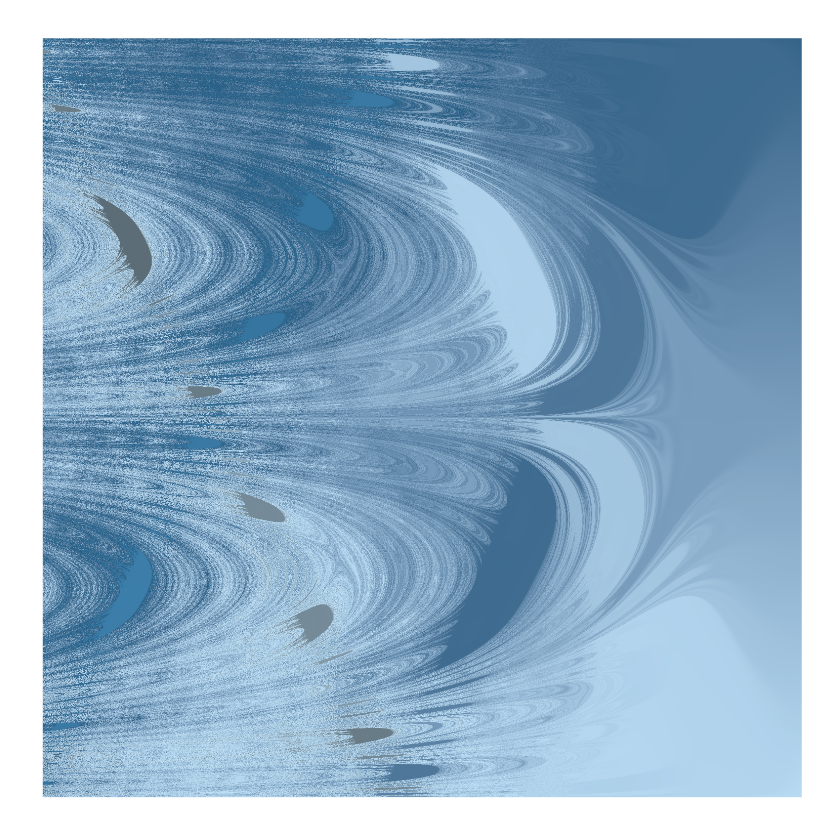

In [59]:
my_seed <- round(runif(1, 0, 958639673))
set.seed(my_seed)

canvas_circlemap(colors = colorPalette("dark2"))

# save the output together with the seed
ggsave(str_c('my-awesome-plot-',my_seed,'.png'))

You can also take a look at the examples in the advanced module - they may contain a bit more code but if you run the cells in order, and change one thing at a time you will do just fine.

Remember to share your end result with the rest of us!

# Advanced module 
If you already have some coding experience, the exercises above may seem a little simplistic as we use them to get familiar with concepts such as functions, arguments and axes. You're welcome to follow along the workshop as is, but if you're keen to go faster and try out more things, you can also try your hand at exercises below. 

## Note about colab
Connecting to google drive from colab running in R-runtime seems much more difficult than one would think, so I recommend saving your notebook via github instead (or downloading everything to your local computer at the end of the workshop).

## R syntactic quirks
Here's a few quirks about R syntax, that may not be obvious and that may help you along the way. 
1. Indexing starts from 1, not 0
2. Indentation doesn't matter for code execution.
3. Both `<-` and `=` can be used to assign values to variables. I will be mostly using `<-` as it is the R "canonical way" and may be more understandable for beginners but `=` works just as well. For assigning values within a function call (such as `color='black'`), use `=`.
4. The 'magrittr pipe'` %>%` (part of tidyverse family of packages; here imported via the package dplyr) is used to combine multiple commands to a sequence. It works similarly to a | pipe on the command line or '.' in pandas: it takes the output of the left hand side of the pipe and feeds it as the first parameter to the function on the right hand side of the pipe.
5. Many of the plotting libraries used for generating art build on something called "Grammar of Graphics" (package ggplot2). Here, the different "layers" (e.g. type of plot, data to be mapped, text overlaid on plot) are combined via a plus sign (`+`). [Here is a short intro to grammar of graphics](http://homepage.stat.uiowa.edu/~luke/classes/STAT4580-2022/ggplot.html) and [here is a much longer one](https://ggplot2-book.org/index.html) - or you could just try to google examples and test those out.
6. Vectors are created with the function `c()` (c stands for combine). Vectors can contain strings or numbers, but if you try to create a vector with both strings and numbers, the numbers will get converted to strings.
7. Missing values are represented with NA (similar to NaN in Python).


# aRtsy

One fantastic package for creating multiple different types of generative art is called aRtsy. In this task, you will create one or more pieces of art using the aRtsy package.
1. Check out [the aRtsy package website](https://koenderks.github.io/aRtsy/)
2. Pick out one of the art functions that appeals to you visually
3. Play around with the parameters to the function (+ test different random seeds) to create something you think looks great
4. Save your end result
5. Please share your creation with others in the event Slack! 

Tip: [The color palettes natively available at aRtsy](https://koenderks.github.io/aRtsy/#color-palettes) are listed at the bottom of the aRtsy website

Saving 6.67 x 6.67 in image


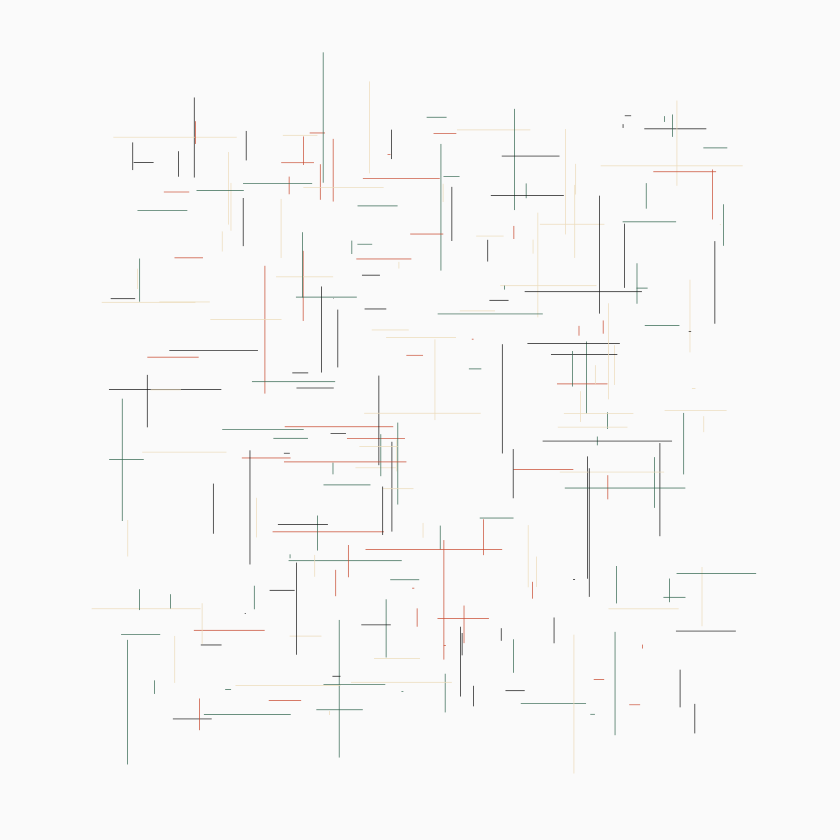

In [61]:
# I like the look of the Mondrian-esque canvas_segments, so I'll do an example using that
# You should pick whichever one you like best
# We'll start with the defaults
canvas_segments(colors=colorPalette("dark1"))

# you can save your plot with ggsave
ggsave('pretending-to-be-mondrian.png')

Warning message:
“Removed 56 rows containing missing values (`geom_segment()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 56 rows containing missing values (`geom_segment()`).”


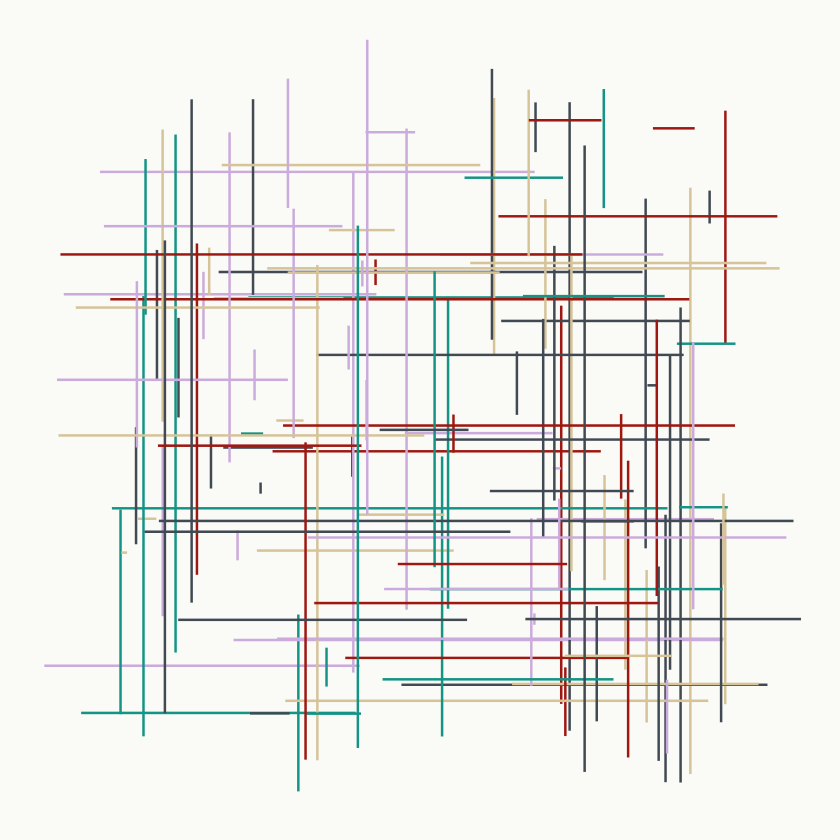

In [64]:
# Let's take a look at the documentation https://koenderks.github.io/aRtsy/reference/canvas_segments.html 
# to see which other parameters we can edit: 
canvas_segments(colors = colorPalette("sooph"), background = "#fafaf7", n = 200,
                p = 0.5, H = 0.6, size = 0.7)
                
ggsave('pretending-to-be-mondrian_2.png')

[1] 29697503


Saving 6.67 x 6.67 in image


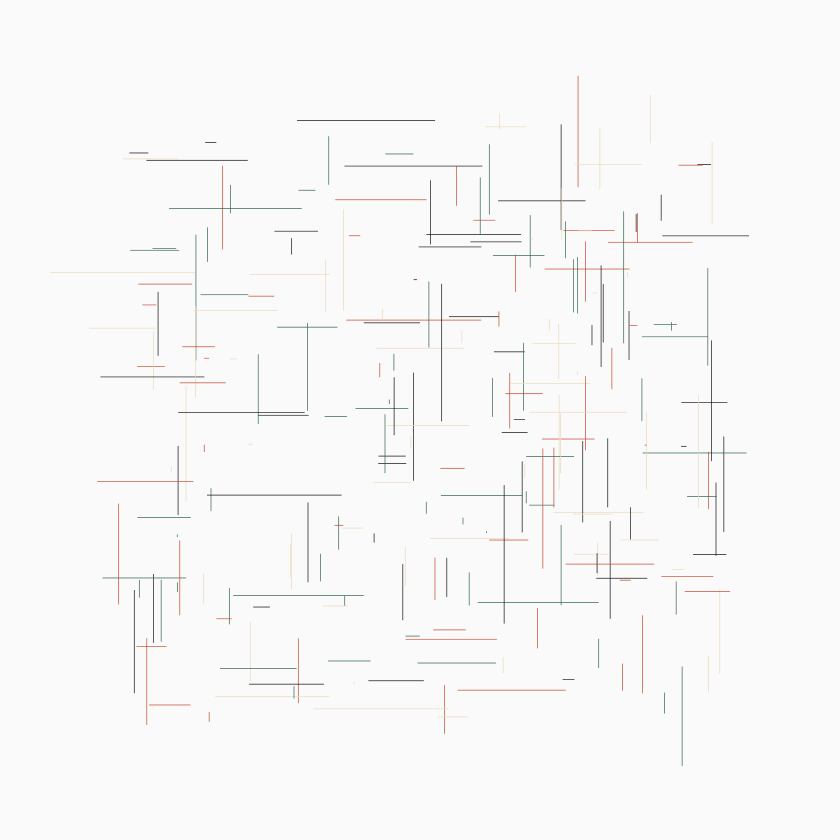

In [67]:
# If you want to be able to work on the same art piece for longer, you can track your random seed
# by explicitly assigning it and printing it out 
# (so if you happen across a work you particularly love, you can write down the seed and keep working on it)
my_seed <- round(runif(1, 0, 45634563))
set.seed(my_seed)
print(my_seed)
canvas_segments(colors = colorPalette("dark1"), background = "#fafafa", n = 250,
                p = 0.5, H = 0.1, size = 0.2)
# now let's make the plot name include the random seed
# now the seed number gets saved 
# str_c is a function that concatenates strings together
ggsave(str_c('pretending-to-be-mondrian-',my_seed,'.png'))

[1] 8089


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


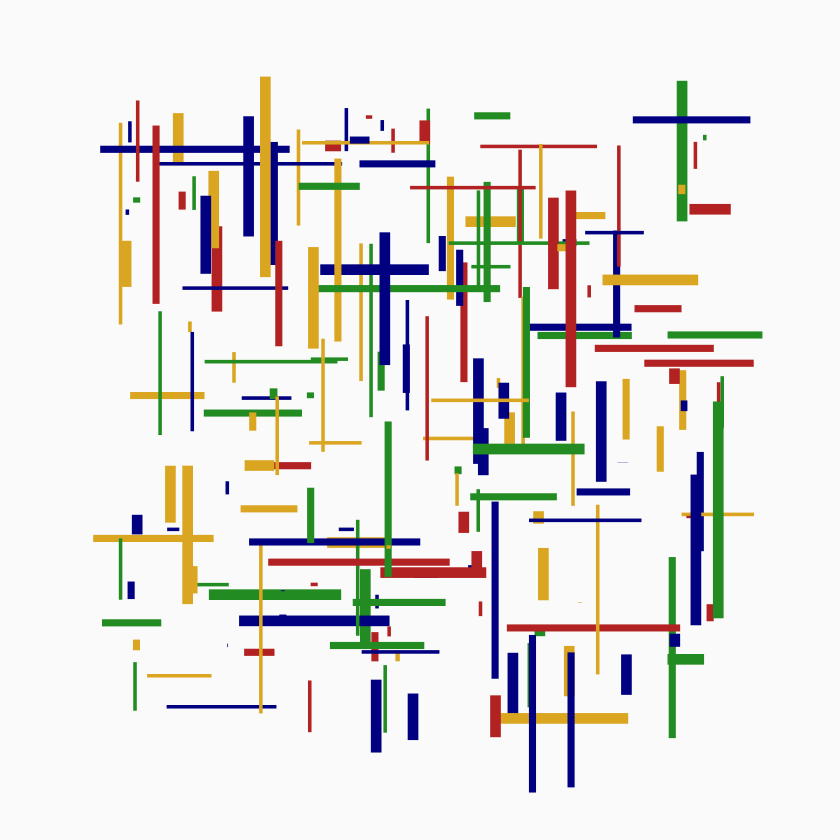

In [68]:
# Note that you need to set the seed separately in each cell
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)
print(my_seed)

# Now play around with the parameters until you end up with something you like visually. 
canvas_segments(colors=colorPalette('tuscany1'), background = "#fafafa", n = 200,
                p = 0.6, H = 0.15, size = 3)

ggsave(str_c('pretending-to-be-mondrian-',my_seed,'.png'))

# Mathart
Another fantastic pakcage for generative art focusing on mathematic phenomena is a package called Mathart.

1. Check out the [mathart github repo](https://github.com/marcusvolz/mathart
)
2. Pick out one of the example images that appeals to you visually
3. Tweak the parameters to test how they impact the end result. 
Tip: Note that you may have to do smaller changes to parameter values here than you did in aRtsy due to the complex matbhematical formulae involved. I recommend starting with the default parameters and, once you see how the plot looks with those, trying to tweak the values a little bit, one at a time.
4. Save your end result
5. Please share your creation with others in the event Slack! 

Tip: here, you may want to specify a particular color for the output. Mathart itself does not have built-in palettes but it uses the ggplot2 package which knows the following [color name definitions](http://sape.inf.usi.ch/quick-reference/ggplot2/colour). You can also define color by its HEX code or RGB value [(see e.g. here for some examples)](https://bookdown.org/hneth/ds4psy/D-5-apx-colors-define-use-custom.html)

In [1]:
library(mathart)
library(ggforce)
library(Rcpp)
library(tidyverse)

ERROR: ignored

In [70]:
# I'm fascinated with the plot displaying Lissajous curves as 
# k nearest neighbors
# (more info at https://en.wikipedia.org/wiki/Lissajous_curve and
# https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) 
# so I'll work an example using that. 
# You should pick the plot that appeals to you! 
# (but don't be surprised if some of the plots take several minutes to run, 
# some of this stuff is very computationally heavy and cannot really 
# utilise the GPU available at colab)

# First, I copy the plot code exactly as it is on the github page
set.seed(2)
# here we create a dataframe to with all the data to be plotted
df <- lissajous(a = runif(1, 0, 2), b = runif(1, 0, 2), A = runif(1, 0, 2), B = runif(1, 0, 2), d = 200) %>%
  sample_n(1001) %>%
  k_nearest_neighbour_graph(40)

# a ggplot plot starts with a call to ggplot() and is defined by a number of 
# layers connected with + 
# these layers define what should be plotted, how and with what parameters
# the plot object can be assigned into a variable just like anything else
p <- ggplot() +
  geom_segment(aes(x, y, xend = xend, yend = yend), df, linewidth = 0.03) +
  coord_equal() +
  theme_blankcanvas(margin_cm = 0)

ggsave("knn_lissajous_002.png", p, width = 25, height = 25, units = "cm")

In [ ]:
# that saved the plot but didn't show it :( 
# to see the plot I add a call to the plot variable p

p


In [ ]:
# I want to see how the curves change when we change the random seed
# so I edit that
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)

df <- lissajous(a = runif(1, 0, 2), b = runif(1, 0, 2), A = runif(1, 0, 2), B = runif(1, 0, 2), d = 200) %>%
  sample_n(1001) %>%
  k_nearest_neighbour_graph(40)

p <- ggplot() +
  geom_segment(aes(x, y, xend = xend, yend = yend), df, linewidth = 0.03) +
  coord_equal() +
  theme_blankcanvas(margin_cm = 0)

p

# now the seed number gets saved 
# str_c is a function that concatenates strings together
ggsave(str_c("knn_lissajous_", my_seed, ".png"), p, width = 25, height = 25, units = "cm")

In [ ]:
# Now it's time to start playing around with arguments!
# first up, changing colors
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)

df <- lissajous(a = runif(1, 0, 2), b = runif(1, 0, 2), A = runif(1, 0, 2), B = runif(1, 0, 2), d = 200) %>%
  sample_n(1001) %>%
  k_nearest_neighbour_graph(40)

p <- ggplot() +
  # on this line, we can add an argument "color" with the color name or code we want the lines to be drawn in
  geom_segment(aes(x, y, xend = xend, yend = yend), df, size = 0.03, color="#242254") +
  coord_equal() +
  theme_blankcanvas(margin_cm = 0)+
  # this is how we can add a colored background to our work
  theme(plot.background = element_rect(fill="#92a4d7"))

p

ggsave(str_c("knn_lissajous_", my_seed, ".png"), p, width = 25, height = 25, units = "cm")

In [ ]:
# Another cool trick that sometimes works is changing the axis from linear to polar coordinates
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)

df <- lissajous(a = runif(1, 0, 2), b = runif(1, 0, 2), A = runif(1, 0, 2), B = runif(1, 0, 2), d = 200) %>%
  sample_n(1001) %>%
  k_nearest_neighbour_graph(40)

p <- ggplot() +
  geom_segment(aes(x, y, xend = xend, yend = yend), df, size = 0.03, color="#242254") +
  # here, we can replace coord_equal
  # coord_equal() +
  # with coord_polar() to use polar coordinate system
  coord_polar() +
  theme_blankcanvas(margin_cm = 0)+ 
  theme(plot.background = element_rect(fill="#92a4d7"))

p

ggsave(str_c("knn_lissajous_", my_seed, ".png"), p, width = 25, height = 25, units = "cm")

:Some additional ideas on what you might want to try changing: line size (size-argument), linetype ([a quick guide here](http://sape.inf.usi.ch/quick-reference/ggplot2/linetype)), opacity (argument alpha), adding title to your plot ([quick intro here](http://www.cookbook-r.com/Graphs/Titles_(ggplot2))). 

Experiment as long & with as many different plot types as you feel like! Don't forget to share your favorite plots on slack - we'd all love to see them. If you got curious about the inner workings of these functions, there's a list of extra resources at the end of this document.


# Additional resources
Here's a number of tutorials and additional resources where you can find more information about generative art using R. This list is by no means exhaustive and if this workshop was your first encounter with coding, some of them may be a bit tricky to follow but many of them are very beginner friendly. If you know of good resources that aren't mentioned here, please share them on Slack!

## Resources for learning R
- [Data science in R, a gentle introduction](https://bookdown.org/jgscott/DSGI/)
- [R for the rest of us](https://rfortherestofus.com/courses/getting-started/)
- [The big book of R, especially the New to R? section](https://www.bigbookofr.com/index.html)
- [R for data science (free ebook)](https://r4ds.had.co.nz/)
- [YaRrr! The pirate's guide to R](https://bookdown.org/ndphillips/YaRrr/)
- [Exploratory data analysis with R](https://bookdown.org/rdpeng/exdata/)
- [Data Visualisation in R (course materials)](https://data-vis-2021.djnavarro.net/materials/)


## Resources for generative art
- [materials from Danielle Navarro's "ART FROM CODE" workshop](https://art-from-code.netlify.app/)
- [Danielle Navarro's list of generative art resources](https://blog.djnavarro.net/posts/2021-10-19_rtistry-posts/)
- [materials from Ijeamaka Anyene's talk on generative art](https://github.com/Ijeamakaanyene/anatomy_of_generative_art)
- [a brief introduction to couple of different packages for generative art](https://towardsdatascience.com/getting-started-with-generative-art-in-r-3bc50067d34b)

## Inspiration and packages for generative art
- [nrennie/aRt](https://nrennie.rbind.io/portfolio/rtistry/)
- [ambient](https://ambient.data-imaginist.com/)
- [Pierre Casadebaigs repository with art](https://github.com/picasa/generative_examples)
- [Mystery curves](https://georgemsavva.github.io/creativecoding/posts/mystery/)
- [Thomas Lin Pedersen art](https://www.data-imaginist.com/art)
- [Danielle Navarro art](https://art.djnavarro.net/)
- [Marcus Volz art](https://marcusvolz.com/#generative-art)
- [Jacquie Tran art](https://art.jacquietran.com/)
